In [2]:
!pip install tweepy
!pip install transformers
!pip install torch

In [3]:
!pip install emoji

In [4]:
import tweepy
import os.path as path
import numpy as np
import nltk.tokenize as tk
import math
import scipy.stats as stats
import pandas as pd
import huggingface_hub
from scipy.stats import pearsonr
from transformers import AutoTokenizer
from transformers import AutoModelForMaskedLM
import torch
from transformers import BertModel
import sklearn.cluster
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import random
import emoji


In [5]:
def get_all_examples():
    """Load all examples from a CSV file using pandas and return those that contain text.

    Returns:
        A list of tweets (or data) that contain text.
    """
    save_file = './twitter_emoji.csv'

    if path.exists(save_file):
        df = pd.read_csv(save_file, lineterminator = '\n')
        ids_to_examples = df[df['Text'].notna()].to_dict(orient='records')  # Convert to list of dicts
    else:
        print('Could not find tweets, so returning an empty list!')
        ids_to_examples = []

    return ids_to_examples


def get_emojis_in_tweet(tweet, emojis, tokenizer):
    """Get a list of all the emojis in a tweet based on the sets provided

    Args:
        tweet: Tweet
        tokenizer: NLTK tokenizer

    Returns:
        Emojis in a tweet
    """
    tokens = tokenizer.tokenize(tweet['Text'])
    ems = set()
    for token in tokens:
        if token in emojis:
            ems.add(token)
    return ems


def get_tweets_with_emoji(tweets, emojis):
    """Get all tweets with emoji in the sets

    Args:
        tweets: List of Tweets

    Returns:
        All tweets containing emoji

    """
    tokenizer = tk.TweetTokenizer(preserve_case=False, reduce_len=True, strip_handles=True)
    ems = list()
    for tweet in tweets:
        if get_emojis_in_tweet(tweet, emojis, tokenizer):
            ems.append(tweet)
    return ems


In [206]:
skull_df = pd.read_csv("emoji_twitter_dataset2/skull.csv")

In [207]:
skull_list = list(skull_df["Text"])

In [105]:
from collections import defaultdict

In [ ]:
# tweets = get_all_examples()
# all_emoji = defaultdict(int)
# for tweet in tweets:
#     line = tweet["Text"]
#     for em in emoji.emoji_list(line):
#         em = em["emoji"]
#         all_emoji[em] += 1

In [ ]:
# all_emoji
# sorted_dict = {k: v for k, v in sorted(all_emoji.items(), key=lambda item: item[1], reverse=True) if v > 80}
# print(sorted_dict)

{'👉': 24693, '👈': 3773, '😍': 2285, '✅': 1285, '🔥': 1132, '👇': 1115, '💥': 655, '🥺': 628, '🔴': 533, '❤️': 462, '⚡': 456, '💰': 433, '🤣': 420, '🎉': 405, '✨': 388, '🚀': 377, '😭': 376, '👀': 361, '😂': 352, '🚨': 332, '👌': 291, '🐰': 282, '🔗': 281, '🎯': 265, '📢': 260, '💯': 257, '🤩': 257, '⚽': 255, '⭐': 253, '🙏': 241, '🏆': 227, '👍': 222, '📺': 219, '😎': 217, '🌟': 214, '➡️': 214, '💜': 192, '📈': 190, '❤': 189, '🆚': 186, '🇺🇸': 186, '😳': 183, '💙': 180, '🎁': 174, '🥰': 172, '🤔': 172, '❗': 171, '🥹': 167, '‼️': 162, '🙌': 162, '🌹': 158, '⏰': 157, '🤭': 153, '▪️': 150, '🐣': 147, '🤑': 147, '💪': 147, '💋': 146, '🥊': 141, '🥚': 134, '🎨': 134, '📣': 128, '⛳': 126, '📲': 125, '📍': 124, '😉': 124, '⁉️': 120, '⏩': 120, '📌': 116, '💕': 116, '🤝': 114, '📉': 114, '➡': 114, '⏳': 112, '💖': 110, '👅': 107, '🥳': 107, '💸': 106, '💚': 106, '📸': 103, '🌷': 102, '💦': 102, '🤡': 101, '💎': 98, '😘': 98, '💫': 95, '🟢': 95, '👋': 94, '😊': 93, '💛': 88, '✔️': 88, '🌐': 86, '🤗': 86, '🔻': 86, '👏': 85, '▶': 84, '🖌️': 83, '🍒': 83, '🎈': 82, '🍬': 81, '

In [208]:
target_emoji = "💀"
emojis = [target_emoji]


# tweets = get_all_examples()
# tweetsWithEmoji = get_tweets_with_emoji(tweets, [target_emoji])
# emojis = []
# for tweet in tweetsWithEmoji:
#     line = tweet["Text"]
#     for em in emoji.emoji_list(line):
#         emojis.append(em["emoji"])

checkpoint = 'bert-base-uncased'
# checkpoint = 'cardiffnlp/twitter-roberta-base-emoji'

model = AutoModelForMaskedLM.from_pretrained(checkpoint)
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
tokenizer.add_tokens(emojis)
model.resize_token_embeddings(len(tokenizer))

c:\Users\dwbru\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'bert.pooler.dense.bias', 'cls.seq_relationship.weight', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
You are resizing the embed

Embedding(30523, 768)

In [210]:
# tweets = get_all_examples()
# tweetsWithEmoji = get_tweets_with_emoji(tweets, [target_emoji])
tweetsWithEmoji = skull_list
lines = []
for tweet in tweetsWithEmoji:
    line = tweet
    for em in emoji.emoji_list(line):
        em = em["emoji"]
        line = line.replace(em, " " + em + " ")
    line = line.replace("  ", " ")
    lines.append(line)


print(len(lines))
print(lines[0:4])

20000
['Y’all gotta not put so much thought in the Super Mario Bros Movie 💀 ', 'I ordered Coke Zero and they gave it to me in what looks like a plastic lassi da glass from the pind 💀 ', "@portalchopped actually i think itd be funnier if itd be just a lego character and the other's original render next to eachother,,, 💀 also what pairing is lotusflare? :o", '@percivalfan Oh, either way the pressure is real 😭 💀 ']


In [211]:
# and adapting the other function
def combined_vector_for(targetword, text, bert_input, bert_output,
                        layer = -1, word_occurrence = 0):
    """
    calculate a word vector
    based on the mean of the WordPiece vectors in the given layer.
    targetword is a word appearing in text.
    bert_input is the whole dictionary returned by the tokenizer.
    bert_output is the last-layer output obtained
    on this text.
    """
    tokenized_text = [w for w, n in tokenizer.backend_tokenizer.pre_tokenizer.pre_tokenize_str(text)]

    # where in the tokenized text (split into words but not split into word pieces)
    # do we find the target word?
    target_word_indices = [i for i, x in enumerate(tokenized_text) if x == targetword]

    # sanity check
    if len(target_word_indices) < word_occurrence + 1:
        # no occurrences found, or not enough to match the required one
        print("Target Word Not Found")
        return None

    # if multiple occurrences of the target word, we use this one
    usethis_targetword_index = target_word_indices[ word_occurrence]

    # use word_to_tokens to determine the word piece span of the target word
    word_start, word_end = bert_input.word_to_tokens( usethis_targetword_index )

    # extract the embeddings from the right layer, and the target vectors from that layer
    embeddings= bert_output["hidden_states"][layer]
    # print(embeddings.shape)
    target_vectors = embeddings[0, word_start:word_end, :]

    # if we have multiple word pieces for ti'his word, average over them
    avg_target_vector = target_vectors.mean(dim = 0)

    return avg_target_vector.detach().numpy()



In [212]:
embeddings = []
# checkpoint = 'bert-base-uncased'
for line in lines:

    text = line

    bert_inputs = tokenizer(text, padding=True, truncation=True,  return_tensors="pt")

    tokens = tokenizer.tokenize(text, add_special_tokens = True)
    # print(tokens)
    # print(tokenizer.backend_tokenizer.pre_tokenizer.pre_tokenize_str(text))

    bert_output = model(bert_inputs["input_ids"], output_hidden_states = True)

    charge_output = combined_vector_for(target_emoji, text, bert_inputs, bert_output, layer = 7, word_occurrence = 0)
    # print(text)
    # print("-------------")

    embeddings.append(charge_output)

print(len(embeddings))
# print(embeddings)


Target Word Not Found
Target Word Not Found
Target Word Not Found
Target Word Not Found
Target Word Not Found
Target Word Not Found
Target Word Not Found
Target Word Not Found
Target Word Not Found
Target Word Not Found
Target Word Not Found
Target Word Not Found
Target Word Not Found
Target Word Not Found
Target Word Not Found
Target Word Not Found
Target Word Not Found
Target Word Not Found
Target Word Not Found
Target Word Not Found
Target Word Not Found
Target Word Not Found
Target Word Not Found
Target Word Not Found
Target Word Not Found
Target Word Not Found
Target Word Not Found
Target Word Not Found
Target Word Not Found
Target Word Not Found
Target Word Not Found
Target Word Not Found
Target Word Not Found
Target Word Not Found
Target Word Not Found
Target Word Not Found
Target Word Not Found
Target Word Not Found
Target Word Not Found
Target Word Not Found
Target Word Not Found
Target Word Not Found
Target Word Not Found
Target Word Not Found
Target Word Not Found
Target Wor

TypeError: cannot unpack non-iterable NoneType object

In [213]:
embeddings = [x for x in embeddings if x is not None]
print(len(embeddings))

2328


In [214]:
kmeans = sklearn.cluster.KMeans(n_clusters=5, random_state=2048).fit(embeddings)
#random_state makes clustering deterministic - it's a seed value

In [215]:
cluster_list = kmeans.predict(embeddings)
print(len(list(cluster_list)))
print((list(cluster_list)))

2328
[2, 2, 1, 0, 1, 4, 2, 1, 2, 1, 0, 1, 2, 1, 1, 1, 1, 4, 4, 2, 2, 1, 2, 1, 0, 4, 2, 2, 4, 0, 3, 0, 2, 1, 1, 1, 2, 1, 0, 0, 2, 4, 0, 1, 0, 1, 0, 3, 1, 4, 2, 3, 0, 0, 1, 0, 4, 3, 1, 0, 0, 4, 1, 1, 2, 0, 2, 2, 0, 4, 0, 1, 1, 4, 4, 2, 1, 2, 0, 2, 3, 1, 3, 1, 2, 4, 2, 2, 3, 2, 1, 1, 1, 2, 4, 2, 2, 1, 2, 4, 2, 2, 4, 3, 2, 1, 4, 2, 1, 3, 2, 1, 0, 0, 3, 4, 2, 2, 0, 2, 2, 2, 1, 4, 0, 2, 1, 2, 2, 0, 2, 4, 2, 1, 1, 1, 2, 2, 0, 2, 2, 4, 4, 2, 3, 1, 2, 2, 4, 2, 1, 3, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 3, 2, 4, 2, 2, 1, 4, 1, 3, 0, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 3, 4, 2, 2, 4, 4, 3, 3, 3, 3, 2, 1, 0, 4, 2, 3, 0, 2, 4, 0, 2, 2, 1, 2, 4, 1, 1, 0, 1, 0, 1, 4, 1, 3, 2, 3, 2, 3, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 3, 3, 2, 1, 2, 4, 0, 1, 4, 2, 3, 4, 1, 0, 1, 2, 0, 1, 1, 1, 2, 2, 3, 4, 2, 2, 2, 1, 3, 0, 0, 1, 1, 2, 1, 2, 1, 2, 2, 2, 3, 4, 4, 1, 0, 4, 2, 1, 2, 3, 1, 0, 1, 0, 2, 0, 1, 1, 2, 1, 2, 2, 1, 2, 4, 3, 4, 1, 0, 0, 1, 1, 2, 2, 2, 1, 2, 4, 1, 2, 1, 4, 1, 0, 1, 2, 2, 0, 1, 2, 3, 2, 2, 0, 3, 2, 2, 4, 0, 2

In [216]:
cluster_dict = {0:[],1:[],2:[],3:[],4:[]}
for i in range(len(cluster_list)):
  cluster_dict[cluster_list[i]].append(i)

In [ ]:
outs = 5
random.seed(50)
count = 0

for cluster in cluster_dict.keys():
  try:
    sents = random.sample(cluster_dict[cluster],outs)
    for sent in sents:
      print(lines[sent])
      print("---------")
    
  except:
    pass

  print(count, "=======================", count )
  count += 1

@Knight_Of_Coins @House_of_Chav @Black_Galahad @MistressOfSpyce @neogothamartist Then ur in for a treat. I luv both too 😍 💀 https://t.co/nuSNXuuQvQ
---------
New #Bitcoin target is a crazy number for me. Can go pass 50k pre halving and crash towards $20k then 🚀 
---------
@Mitchellbradzzz @GraveNova @FireyJaire @chris @MrBeast but why does it matter if the shooter is trans 💀 they're all judged and imprisoned like they deserve .
---------
@Daveromero15 @YeezusOneil @thicc_stick_boi right like besides shooting guns which is an entire genre of games and a supernatural element this game has literally nothing in common with back 4 blood based on what we have seen dudes a babbling clown who thinks he can just make up ridiculous comparisons to downplay 😂 💀 🤡 https://t.co/L5BOhqJUCW
---------
This bird got me and the homie wyatt dying right now 💀 niggas want beef and they broke. NEED TO STOP  😂   😂   😂  https://t.co/w4NbRn25Hm
---------
0 ======================= 0
@PemaMysterious 💀 
---------


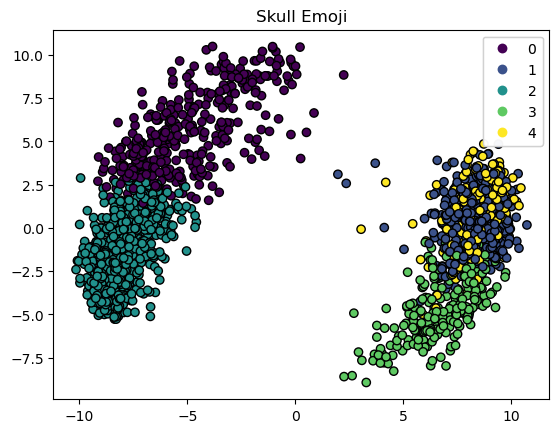

In [220]:
twodim = PCA().fit_transform(embeddings)[:,:2]

# set up the canvas
fig, ax =  plt.subplots()

# add a scatter plot of the two-D embeddings
scatter = ax.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c=cluster_list)
legend1 = ax.legend(*scatter.legend_elements(), loc="upper right")
ax.add_artist(legend1)
plt.title("Skull Emoji")
# and show the canvas
plt.show()